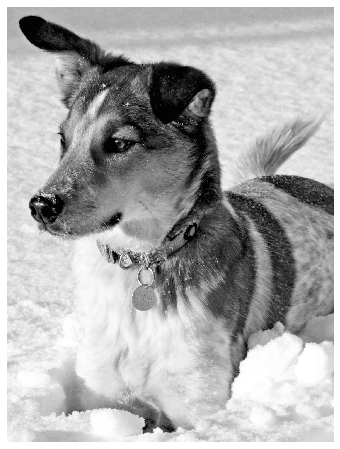

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

A = imread('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/dog.jpg')
X = np.mean(A, axis = 2); 
# Convert RGB to grayscale, 
# axis=2 argument is to average values across all three color channels, the index 2nd axis 
# axis=0 would average across pixel rows and axis=1 would average across pixel columns.

img = plt.imshow(X, cmap = 'gray')
plt.axis('off') #remove axis values
plt.show()

In [37]:
U, S, VT = np.linalg.svd(X,full_matrices=False) 
#fullmatrices false is the economy SVD
S = np.diag(S)

```python
U = array([[-0.02283668, -0.0052333 , -0.01172744, ...,  0.00065928,
        -0.00395613, -0.01246735],
       [-0.02283404, -0.00531349, -0.01168563, ...,  0.02880824,
        -0.04266174,  0.02603928],
       [-0.02281751, -0.00515672, -0.01168216, ..., -0.08173391,
         0.03510163,  0.02365444],
       ...,
       [-0.02806684, -0.01062809, -0.02329974, ..., -0.00825134,
        -0.00881261,  0.06924941],
       [-0.02812135, -0.01042969, -0.02336364, ...,  0.03032404,
         0.00652305, -0.03366969],
       [-0.02811393, -0.01043493, -0.02352557, ...,  0.00503387,
         0.00014365,  0.00086352]])
S = array([2.97619391e+05, 6.13288052e+04, 4.79235274e+04, ...,
       4.86742144e+00, 4.70635876e+00, 4.64139913e+00])

VT = array([[-0.03211614, -0.0321317 , -0.0321091 , ..., -0.02785393,
        -0.02783741, -0.02780677],
       [ 0.002146  ,  0.00230748,  0.00241991, ...,  0.02533956,
         0.02538615,  0.02541503],
       [ 0.0187286 ,  0.01888759,  0.01891868, ...,  0.00338623,
         0.00337254,  0.00341347],
       ...,
       [ 0.01118375, -0.04140488,  0.04889848, ..., -0.05675594,
         0.04370077, -0.02116333],
       [ 0.00219368, -0.00673915,  0.01650742, ..., -0.00778819,
         0.02512136, -0.00834871],
       [-0.00751123,  0.00296443, -0.00792515, ...,  0.01058087,
        -0.01992939,  0.0123927 ]])```

S is a array of vectors, we we need to diagonalize it.

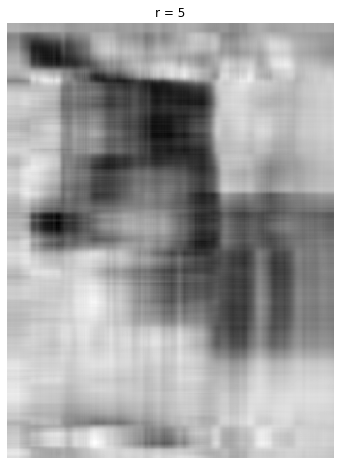

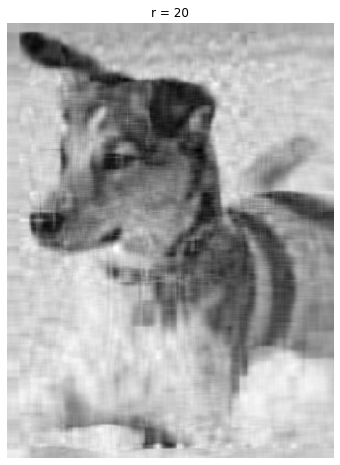

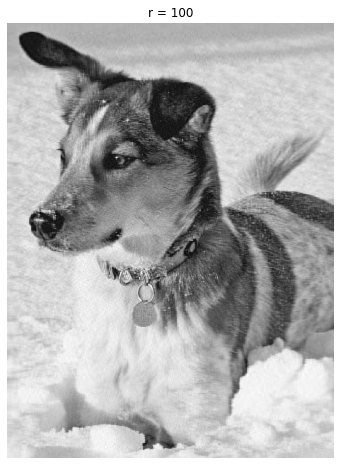

In [39]:
j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    #matrix multiplication
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox, cmap = 'gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

Amazingly rank 100 approx is like only 12% of the actual picture data

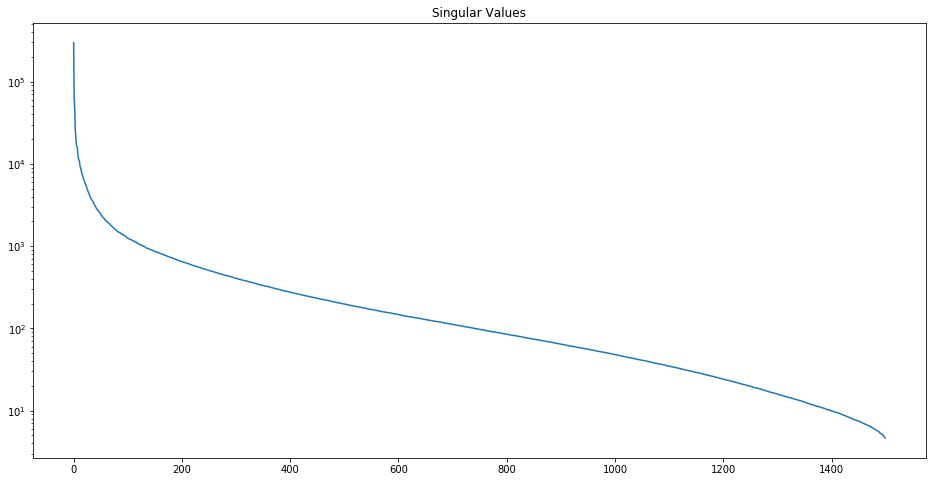

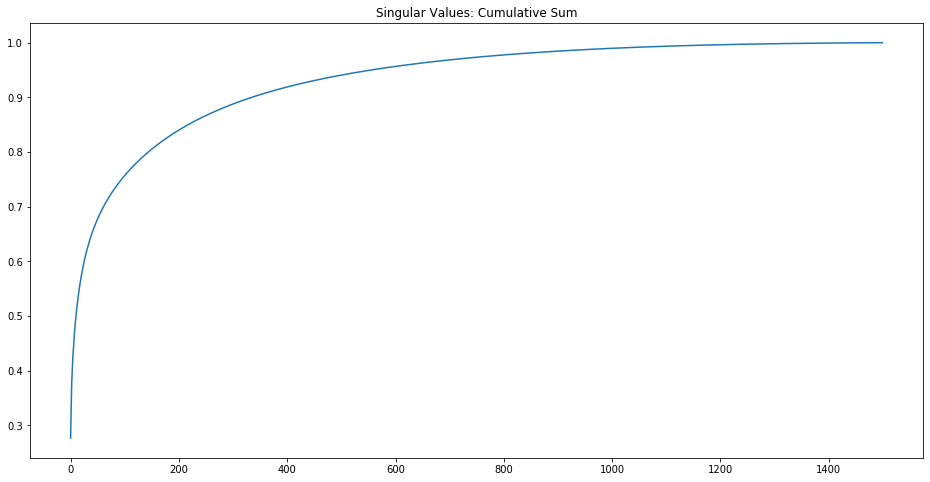

In [40]:
## f_ch01_ex02_2
# We always want to plot the singular values of the log(singular values)
# also the cumulative sum of the sigma values, over the entire cumulative sum

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

The log graphs show that the huge 'energy' of the data is actually in the first few singular values, shows we do not need to keep much of the image data 